In [112]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Experiment data processing

In [113]:
results = {}
for process in range(3):
    results_add = pickle.load(open('MNISTNetRegComparisonReluN10BigKRepeatScaleCheck2/results_repeat%d.pkl' % process, 'rb'))
    results = {**results, **results_add}
for process in range(3):
    results_add = pickle.load(open('MNISTNetRegComparisonReluN10BigKRepeatScaleCheck2B2/results_repeat%d.pkl' % process, 'rb'))
    results = {**results, **results_add}

In [114]:
Layers = 10
KLips = 10
NNeurons = 10
activation = 'relu'
scaler = 100.0
epochs = 500
inputs = 1000
acc_param = 1000
pfirst_options = [0.06]
reg_type_options = ['delta', 'delta_network', 'l1', 'l2', 0]
reg_coeff_options = [0] + list(np.logspace(-10, 0, 6))[:-1]
repetitions = list(range(12))
accs = ['acc_dropout', 'acc_orig']
colors = {'acc_dropout' : 'red', 'acc_orig' : 'green'}

In [115]:
# constructing array
# [pfirst, reg_method, coeffs] -> repetitions

In [118]:
trials = {(p, reg, c): [results[(p, reg, c, rep)]  for rep in repetitions] 
          for p in pfirst_options for reg in reg_type_options for c in reg_coeff_options}

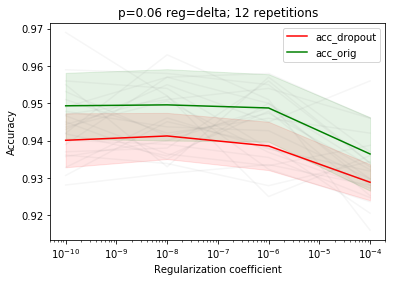

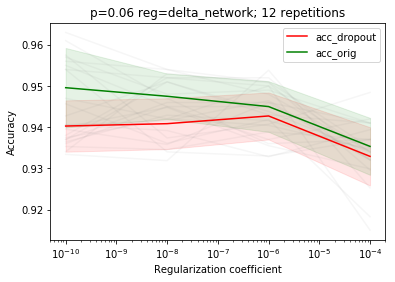

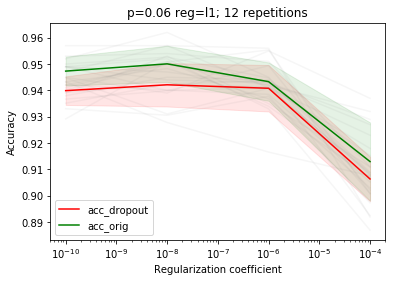

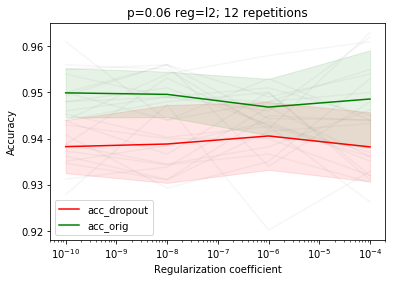

In [125]:
# loop over p
for p in pfirst_options:
    # loop over regularization types
    for reg in reg_type_options[:-1]:
        # x values (regul. coeff)
        reg_on = reg_coeff_options[1:-1]
        
        # reptitions for coefficients
        data = [trials[(p, reg, c)] for c in reg_on]
        
        # pyplot setup
        plt.figure()
        plt.title('p=%.2f reg=%s; %d repetitions' % (p, reg, len(data[0])))
        plt.xlabel('Regularization coefficient')
        plt.ylabel('Accuracy')
        #plt.ylim((0, 1))
        
        # loop over quantities
        for q in accs:
            # data for quantity: coefficient -> quantities
            d = [[rep[q] for rep in trial] for trial in data]
            means = np.mean(d, axis = 1)
            stds = np.std(d, axis = 1)
            for trial in repetitions:
                plt.plot(reg_on, np.array(d)[:, trial], c = 'gray', alpha = 0.07)
            plt.plot(reg_on, means, c = colors[q], label = q)
            plt.fill_between(reg_on, means - stds, means + stds, alpha = 0.1, color = colors[q])
        plt.xscale('log')
        plt.legend()
        plt.show()